# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting accuracy along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [34]:
!pip3 install tensorflow keras

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD  #Stochastic Gradient Descent

import pandas as pd
import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

2023-07-16 14:23:05.935864: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

In [4]:
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

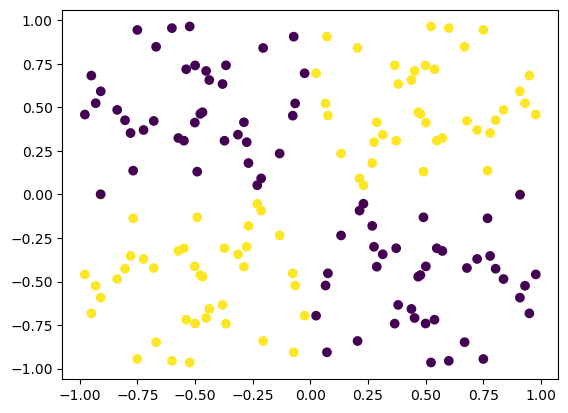

In [5]:
plt.scatter(*zip(*X), c=y)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [==============================] - 0s 1ms/step - loss: 0.6931
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-tr

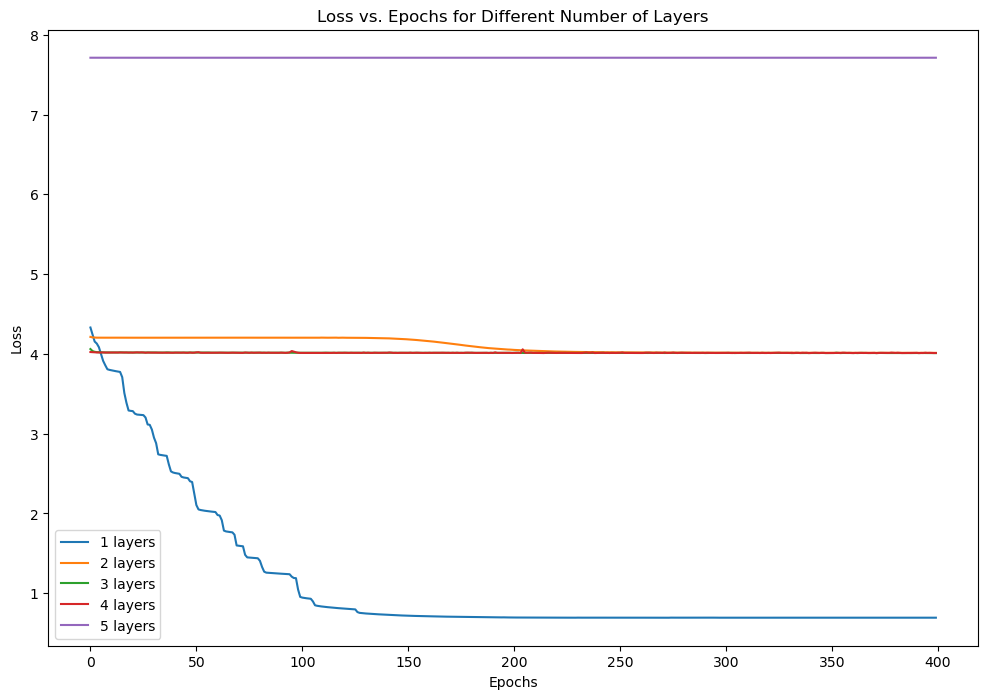

2 Neurons per layer: [1, 0.693149745464325, 2, 4.012002944946289, 3, 4.009472846984863, 4, 4.009335041046143, 5, 7.7124738693237305]


In [6]:
num_layers = [1,2,3,4,5]
scores = []
plt.figure(figsize=(12, 8))
model = Sequential()
model.add(Dense(2, input_dim=2, activation='tanh'))
sgd = SGD(learning_rate=0.1)

for num_layer in num_layers:
    # for the first iteration, the model will only have the base layer
    if num_layer > 1:
        model.add(Dense(2, activation='tanh'))

    model.compile(loss='binary_crossentropy', optimizer='Adam')
   
    history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
    plt.plot(history.history['loss'], label=f'{num_layer} layers')
    
    model.summary()
    
    score = model.evaluate(X, y)
    scores.append(score)
    
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Different Number of Layers')
plt.legend()
plt.show()
printout = [item for sublist in zip(num_layers, scores) for item in sublist]
print("2 Neurons per layer:", printout)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [==============================] - 0s 1ms/step - loss: 1.7975
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
 dense_6 (Dense)             (None, 3)                 12        
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
No

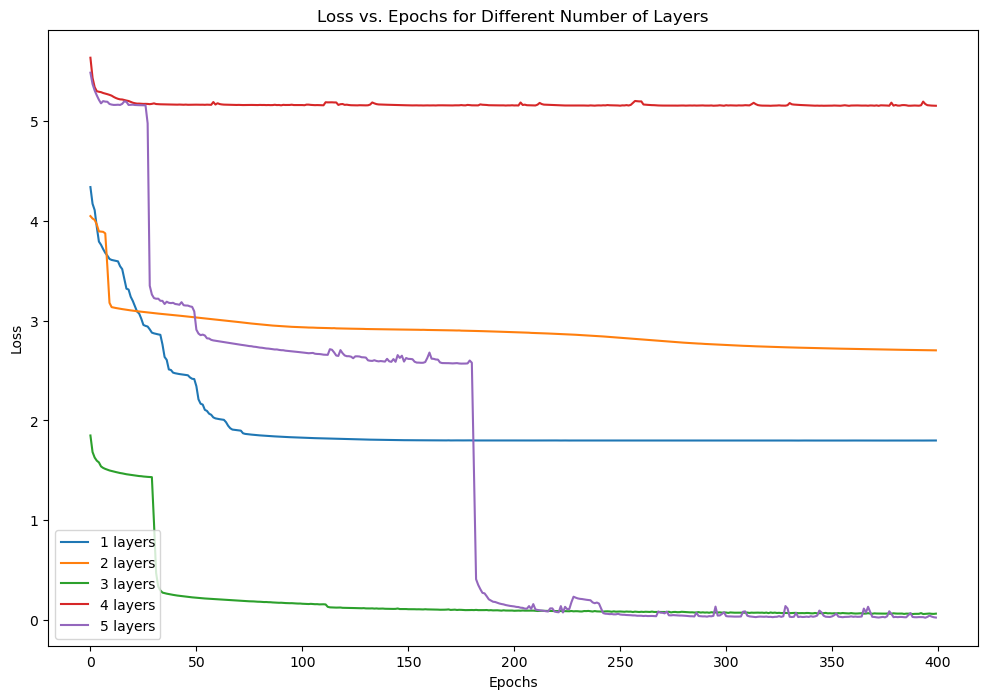

2 Neurons per layer: [1, 0.693149745464325, 2, 4.012002944946289, 3, 4.009472846984863, 4, 4.009335041046143, 5, 7.7124738693237305]
3 Neurons per layer: [1, 1.797528862953186, 2, 2.700294017791748, 3, 0.057295072823762894, 4, 5.149728775024414, 5, 0.021826880052685738]


In [7]:
scores2 = []
plt.figure(figsize=(12, 8))
model = Sequential()
model.add(Dense(3, input_dim=2, activation='tanh'))

for num_layer in num_layers:
    
    if num_layer > 1:
        model.add(Dense(3, activation='tanh'))

    model.compile(loss='binary_crossentropy', optimizer='Adam')
   
    history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
    plt.plot(history.history['loss'], label=f'{num_layer} layers')
    
    model.summary()
    
    score = model.evaluate(X, y)
    scores2.append(score)
    
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Different Number of Layers')
plt.legend()
plt.show()
printout2 = [item for sublist in zip(num_layers, scores2) for item in sublist]
print("2 Neurons per layer:", printout)
print("3 Neurons per layer:", printout2)

Over all the 3 neuron layers appear to perform generally better to the 2 neuron layers. The loss scores are lower than the 2 neuron layers. The best performance so far is 5 layer 3 neuron model with a loss of 0.022.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [==============================] - 0s 1ms/step - loss: 4.0063
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 12        
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
Total params: 32 (128.00 Byte)
Trainable params: 32 (128.00 Byte

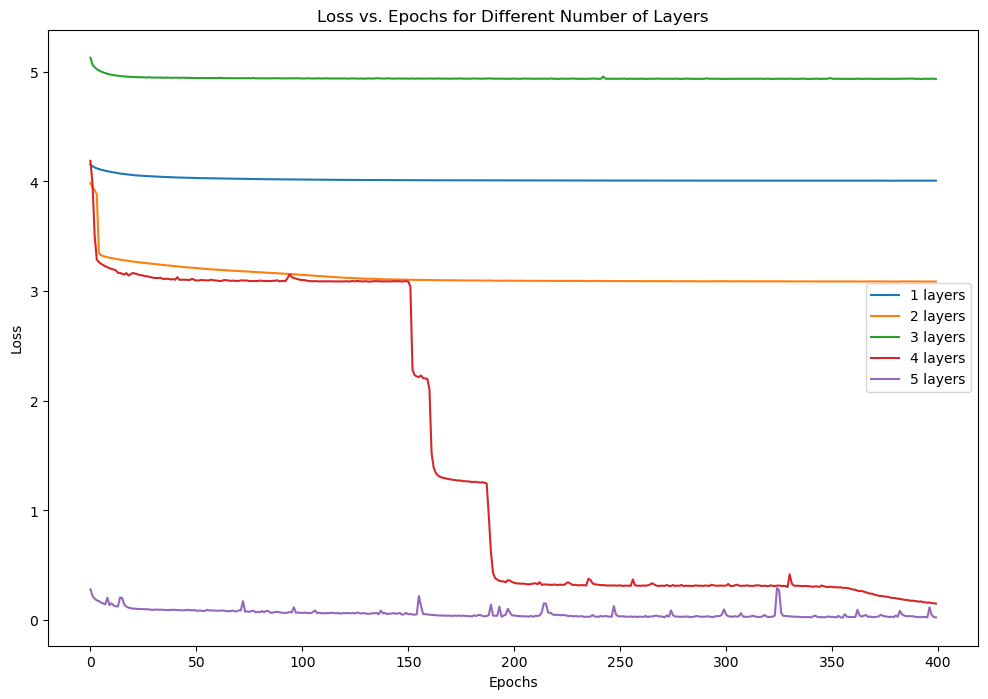

2 Neurons per layer: [1, 0.693149745464325, 2, 4.012002944946289, 3, 4.009472846984863, 4, 4.009335041046143, 5, 7.7124738693237305]
3 Neurons per layer: [1, 1.797528862953186, 2, 2.700294017791748, 3, 0.057295072823762894, 4, 5.149728775024414, 5, 0.021826880052685738]
4 Neurons per layer: [1, 4.006335735321045, 2, 3.0856049060821533, 3, 4.933342456817627, 4, 0.14478500187397003, 5, 0.023132342845201492]


In [8]:
scores3 = []
plt.figure(figsize=(12, 8))
model = Sequential()
model.add(Dense(4, input_dim=2, activation='tanh'))

for num_layer in num_layers:
    
    if num_layer > 1:
        model.add(Dense(4, activation='tanh'))

    model.compile(loss='binary_crossentropy', optimizer='Adam')
   
    history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
    plt.plot(history.history['loss'], label=f'{num_layer} layers')
    
    model.summary()
    
    score = model.evaluate(X, y)
    scores3.append(score)
    
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Different Number of Layers')
plt.legend()
plt.show()
printout3 = [item for sublist in zip(num_layers, scores3) for item in sublist]
print("2 Neurons per layer:", printout)
print("3 Neurons per layer:", printout2)
print("4 Neurons per layer:", printout3)

Generally similar results to the 3 neuron models here. Seems to have more noise in the results of the loss scores. 

Best results are 3 neurons and 5 layers from this iteration with a loss score of 0.022. Even after switching to the Adam optimizer from SGD I am seeing somewhat erratic results between each execution of the for-loop.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 3)                 9         
                                                                 
 dense_16 (Dense)            (None, 3)                 12        
                                                                 
 dense_17 (Dense)            (None, 3)                 12        
                                                                 
 dense_18 (Dense)            (None, 3)                 12        
                                                                 
 dense_19 (Dense)            (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [=============

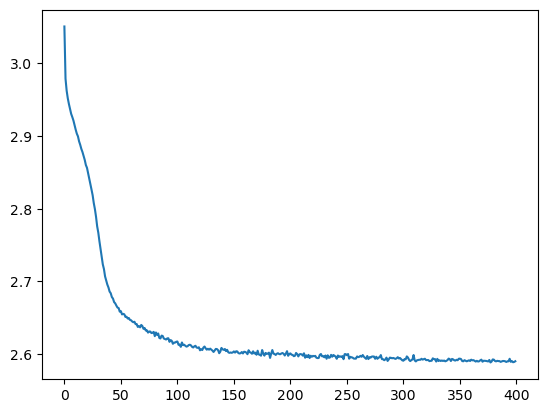

In [9]:
# tanh

model = Sequential()

model.add(Dense(3, input_dim=2, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))

model.compile(loss='binary_crossentropy', optimizer='Adam')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='Tanh')
    
model.summary()

score_tanh = model.evaluate(X, y)

print("Tanh Loss Score:", score_tanh)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 3)                 9         
                                                                 
 dense_21 (Dense)            (None, 3)                 12        
                                                                 
 dense_22 (Dense)            (None, 3)                 12        
                                                                 
 dense_23 (Dense)            (None, 3)                 12        
                                                                 
 dense_24 (Dense)            (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [=============

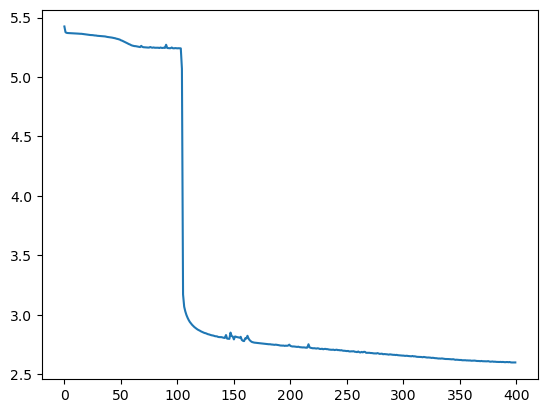

In [10]:
# sigmoid

model = Sequential()

model.add(Dense(3, input_dim=2, activation='sigmoid')) 
model.add(Dense(3, activation='tanh')) # If I have more than 1 sigmoid layer weird things happen.
model.add(Dense(3, activation='tanh')) # If I have all sigmoid layers the code throws errors.
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))


model.compile(loss='binary_crossentropy', optimizer='Adam')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='Sigmoid')
    
model.summary()

score_sigmoid = model.evaluate(X, y)

print("Sigmoid Loss Score:", score_sigmoid)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 3)                 9         
                                                                 
 dense_31 (Dense)            (None, 3)                 12        
                                                                 
 dense_32 (Dense)            (None, 3)                 12        
                                                                 
 dense_33 (Dense)            (None, 3)                 12        
                                                                 
 dense_34 (Dense)            (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [=============

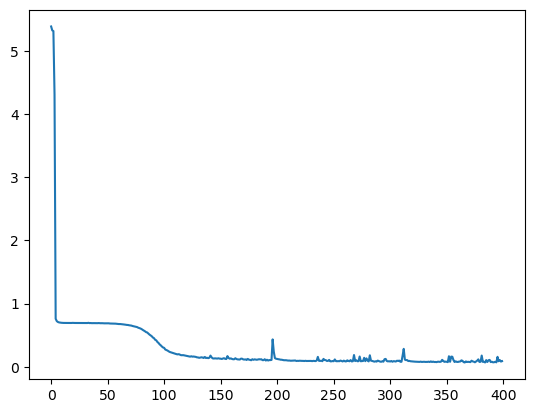

In [12]:
# softplus

model = Sequential()

model.add(Dense(3, input_dim=2, activation='softplus')) 
model.add(Dense(3, activation='softplus'))
model.add(Dense(3, activation='softplus'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='softplus'))

model.compile(loss='binary_crossentropy', optimizer='Adam')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='Softplus')
    
model.summary()

score_soft_plus = model.evaluate(X, y)

print("Softplus Loss Score:", score_soft_plus)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 3)                 9         
                                                                 
 dense_41 (Dense)            (None, 3)                 12        
                                                                 
 dense_42 (Dense)            (None, 3)                 12        
                                                                 
 dense_43 (Dense)            (None, 3)                 12        
                                                                 
 dense_44 (Dense)            (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [=============

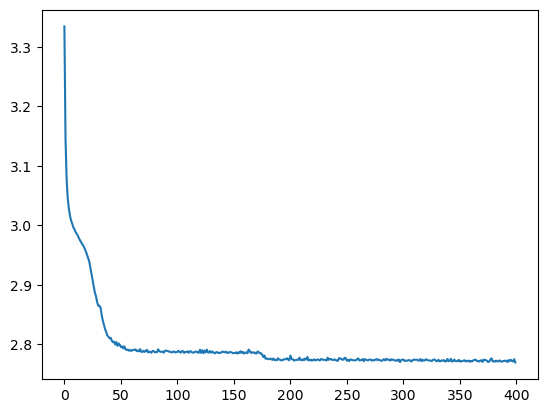

In [14]:
# relu

model = Sequential()

model.add(Dense(3, input_dim=2, activation='relu')) 
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='tanh')) # If I have 4 relu weird things happen
model.add(Dense(3, activation='tanh')) # If I have all relu weird things happen

model.compile(loss='binary_crossentropy', optimizer='Adam')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='Relu')
    
model.summary()

score_relu = model.evaluate(X, y)

print("Relu Loss Score:", score_relu)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 3)                 9         
                                                                 
 dense_46 (Dense)            (None, 3)                 12        
                                                                 
 dense_47 (Dense)            (None, 3)                 12        
                                                                 
 dense_48 (Dense)            (None, 3)                 12        
                                                                 
 dense_49 (Dense)            (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [=============

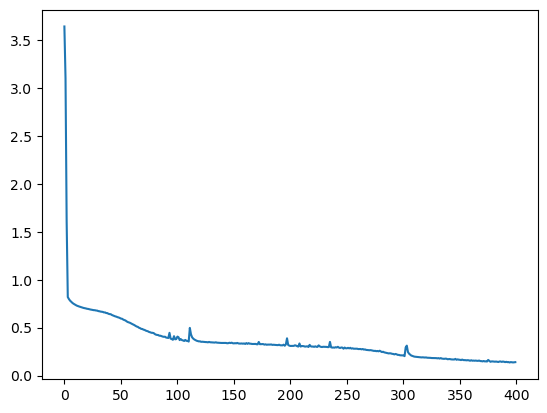

In [15]:
# softmax

model = Sequential()

model.add(Dense(3, input_dim=2, activation='softmax')) 
model.add(Dense(3, activation='tanh')) # Two softmax layers was less optimal than 1 with 2 tanh.
model.add(Dense(3, activation='tanh')) # If I have all softmax layers the code throws errors.
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))

model.compile(loss='binary_crossentropy', optimizer='Adam')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='Softmax')
    
model.summary()

score_softmax = model.evaluate(X, y)

print("Softmax Loss Score:", score_softmax)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 3)                 9         
                                                                 
 dense_51 (Dense)            (None, 3)                 12        
                                                                 
 dense_52 (Dense)            (None, 3)                 12        
                                                                 
 dense_53 (Dense)            (None, 3)                 12        
                                                                 
 dense_54 (Dense)            (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [============

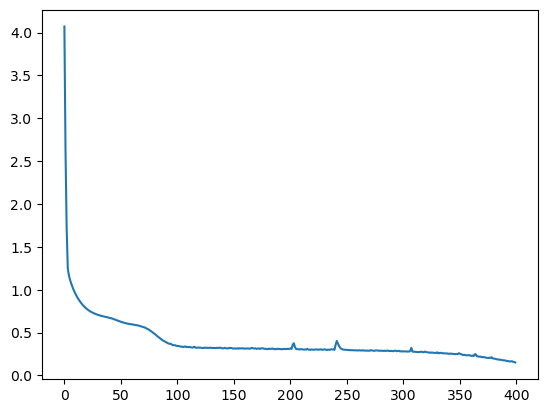

In [16]:
# softsign

model = Sequential()

model.add(Dense(3, input_dim=2, activation='softsign')) 
model.add(Dense(3, activation='softsign'))
model.add(Dense(3, activation='softsign'))
model.add(Dense(3, activation='softsign'))
model.add(Dense(3, activation='tanh')) # 4 softsign layers with 1 tanh layer had best results.

model.compile(loss='binary_crossentropy', optimizer='Adam')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='Softsign')
    
model.summary()

score_softsign = model.evaluate(X, y)

print("Softsign Loss Score:", score_softsign)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 3)                 9         
                                                                 
 dense_56 (Dense)            (None, 3)                 12        
                                                                 
 dense_57 (Dense)            (None, 3)                 12        
                                                                 
 dense_58 (Dense)            (None, 3)                 12        
                                                                 
 dense_59 (Dense)            (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [============

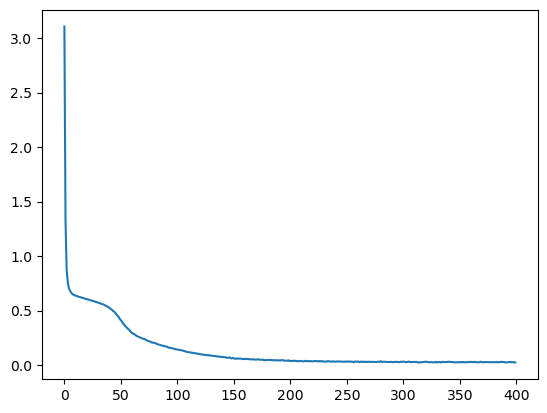

In [17]:
# elu

model = Sequential()

model.add(Dense(3, input_dim=2, activation='elu')) 
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh')) # Diminishing returns with elu. 1 elu and 4 tanh for best results.

model.compile(loss='binary_crossentropy', optimizer='Adam')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='Elu')
    
model.summary()

score_elu = model.evaluate(X, y)

print("Elu Loss Score:", score_elu)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 3)                 9         
                                                                 
 dense_61 (Dense)            (None, 3)                 12        
                                                                 
 dense_62 (Dense)            (None, 3)                 12        
                                                                 
 dense_63 (Dense)            (None, 3)                 12        
                                                                 
 dense_64 (Dense)            (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [============

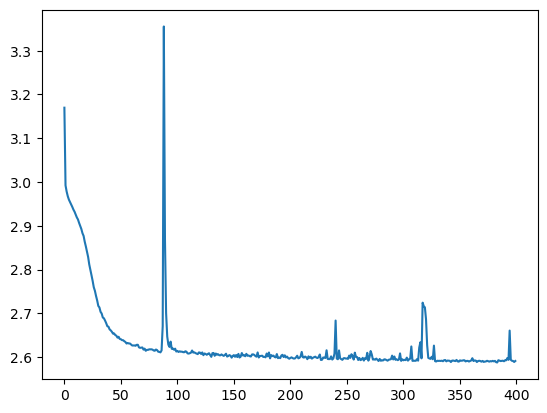

In [18]:
# selu

model = Sequential()

model.add(Dense(3, input_dim=2, activation='selu')) 
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh')) # Diminishing returns with selu. 1 selu 2 tanh for best results.

model.compile(loss='binary_crossentropy', optimizer='sgd')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='Selu')
    
model.summary()

score_selu = model.evaluate(X, y)

print("Selu Loss Score:", score_selu)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 3)                 9         
                                                                 
 dense_66 (Dense)            (None, 3)                 12        
                                                                 
 dense_67 (Dense)            (None, 3)                 12        
                                                                 
 dense_68 (Dense)            (None, 3)                 12        
                                                                 
 dense_69 (Dense)            (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [============

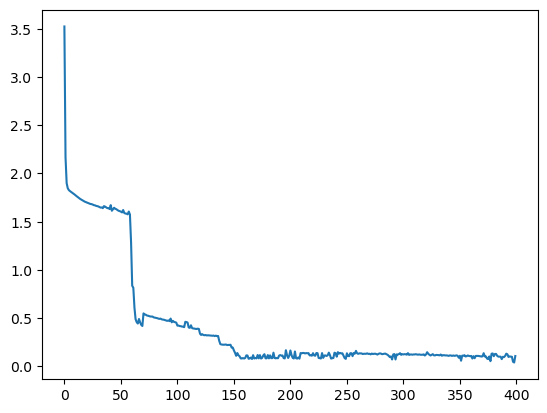

In [19]:
# RMSprop

from keras.optimizers import RMSprop

model = Sequential()

model.add(Dense(3, input_dim=2, activation='elu')) 
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh')) # Diminishing returns with elu. 1 elu and 4 tanh for best results.

model.compile(loss='binary_crossentropy', optimizer='RMSprop')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='RMSprop')
    
model.summary()

score_rmsprop = model.evaluate(X, y)

print("RMSprop Loss Score:", score_rmsprop)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 3)                 9         
                                                                 
 dense_71 (Dense)            (None, 3)                 12        
                                                                 
 dense_72 (Dense)            (None, 3)                 12        
                                                                 
 dense_73 (Dense)            (None, 3)                 12        
                                                                 
 dense_74 (Dense)            (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [============

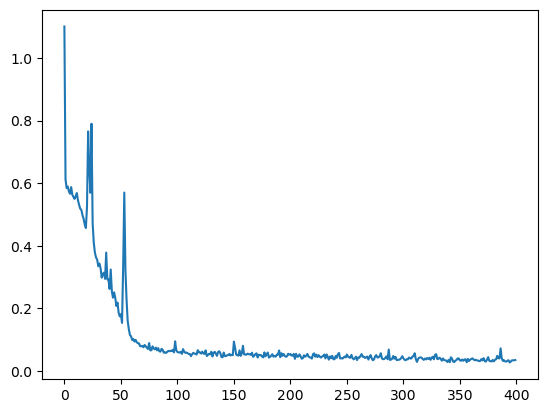

In [20]:
# SGD

from keras.optimizers import Adam

model = Sequential()

model.add(Dense(3, input_dim=2, activation='elu')) 
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh')) # Diminishing returns with elu. 1 elu and 4 tanh for best results.

model.compile(loss='binary_crossentropy', optimizer='sgd')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='SGD')
    
model.summary()

score_SGD = model.evaluate(X, y)

print("SGD Loss Score:", score_SGD)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 3)                 9         
                                                                 
 dense_76 (Dense)            (None, 3)                 12        
                                                                 
 dense_77 (Dense)            (None, 3)                 12        
                                                                 
 dense_78 (Dense)            (None, 3)                 12        
                                                                 
 dense_79 (Dense)            (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [============

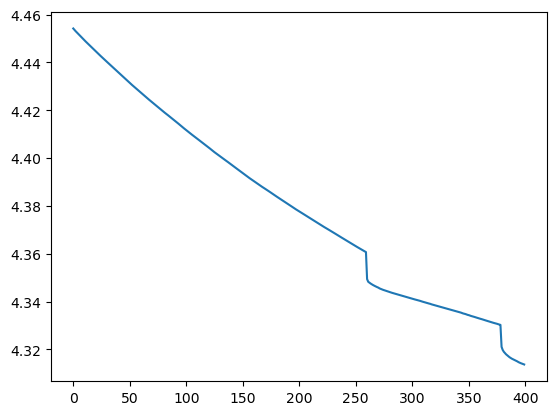

In [21]:
# Adadelta

from keras.optimizers import Adadelta

model = Sequential()

model.add(Dense(3, input_dim=2, activation='elu')) 
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh')) # Diminishing returns with elu. 1 elu and 4 tanh for best results.

model.compile(loss='binary_crossentropy', optimizer='Adadelta')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='Adadelta')
    
model.summary()

score_Adadelta = model.evaluate(X, y)

print("Adadelta Loss Score:", score_Adadelta)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 3)                 9         
                                                                 
 dense_81 (Dense)            (None, 3)                 12        
                                                                 
 dense_82 (Dense)            (None, 3)                 12        
                                                                 
 dense_83 (Dense)            (None, 3)                 12        
                                                                 
 dense_84 (Dense)            (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [============

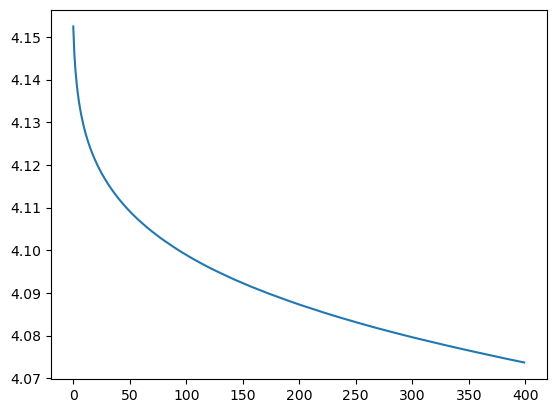

In [22]:
# Adagrad

from keras.optimizers import Adagrad

model = Sequential()

model.add(Dense(3, input_dim=2, activation='elu')) 
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh')) # Diminishing returns with elu. 1 elu and 4 tanh for best results.

model.compile(loss='binary_crossentropy', optimizer='Adagrad')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='Adagrad')
    
model.summary()

score_Adagrad = model.evaluate(X, y)

print("Adagrad Loss Score:", score_Adagrad)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 3)                 9         
                                                                 
 dense_86 (Dense)            (None, 3)                 12        
                                                                 
 dense_87 (Dense)            (None, 3)                 12        
                                                                 
 dense_88 (Dense)            (None, 3)                 12        
                                                                 
 dense_89 (Dense)            (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [============

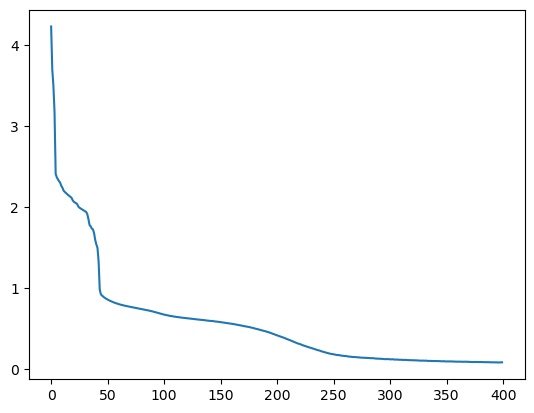

In [23]:
# Adamax

from keras.optimizers import Adamax

model = Sequential()

model.add(Dense(3, input_dim=2, activation='elu')) 
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh')) # Diminishing returns with elu. 1 elu and 4 tanh for best results.

model.compile(loss='binary_crossentropy', optimizer='Adamax')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='Adamax')
    
model.summary()

score_Adamax = model.evaluate(X, y)

print("Adamax Loss Score:", score_Adamax)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 3)                 9         
                                                                 
 dense_104 (Dense)           (None, 3)                 12        
                                                                 
 dense_105 (Dense)           (None, 3)                 12        
                                                                 
 dense_106 (Dense)           (None, 3)                 12        
                                                                 
 dense_107 (Dense)           (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [============

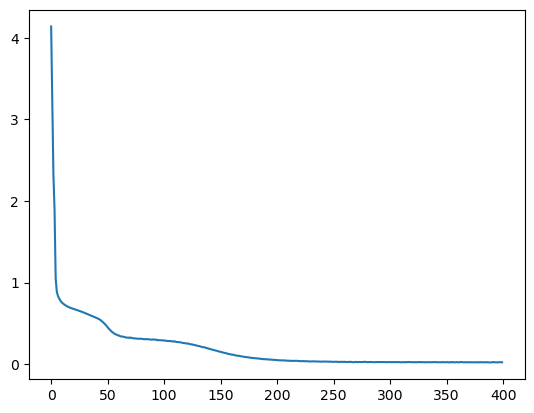

In [27]:
# Nadam

from keras.optimizers import Nadam

model = Sequential()

model.add(Dense(3, input_dim=2, activation='elu')) 
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh')) # Diminishing returns with elu. 1 elu and 4 tanh for best results.

model.compile(loss='binary_crossentropy', optimizer='Nadam')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='Nadam')
    
model.summary()

score_Nadam = model.evaluate(X, y)

print("Nadam Loss Score:", score_Nadam)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 3)                 9         
                                                                 
 dense_94 (Dense)            (None, 3)                 12        
                                                                 
 dense_95 (Dense)            (None, 3)                 12        
                                                                 
 dense_96 (Dense)            (None, 3)                 12        
                                                                 
 dense_97 (Dense)            (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [============

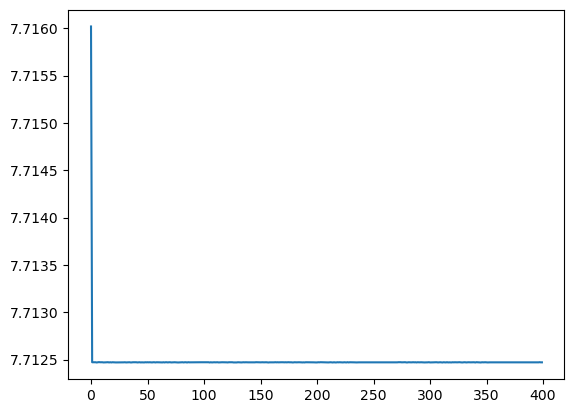

In [25]:
# Ftrl

from keras.optimizers import Ftrl

model = Sequential()

model.add(Dense(3, input_dim=2, activation='elu')) 
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh')) # Diminishing returns with elu. 1 elu and 4 tanh for best results.

model.compile(loss='binary_crossentropy', optimizer='Ftrl')

history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='Ftrl')
    
model.summary()

score_Ftrl = model.evaluate(X, y)

print("Ftrl Loss Score:", score_Ftrl)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 3)                 9         
                                                                 
 dense_99 (Dense)            (None, 3)                 12        
                                                                 
 dense_100 (Dense)           (None, 3)                 12        
                                                                 
 dense_101 (Dense)           (None, 3)                 12        
                                                                 
 dense_102 (Dense)           (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [============

5/5 [==============================] - 0s 1ms/step - loss: 0.6133
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 3)                 9         
                                                                 
 dense_99 (Dense)            (None, 3)                 12        
                                                                 
 dense_100 (Dense)           (None, 3)                 12        
                                                                 
 dense_101 (Dense)           (None, 3)                 12        
                                                                 
 dense_102 (Dense)           (None, 3)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________

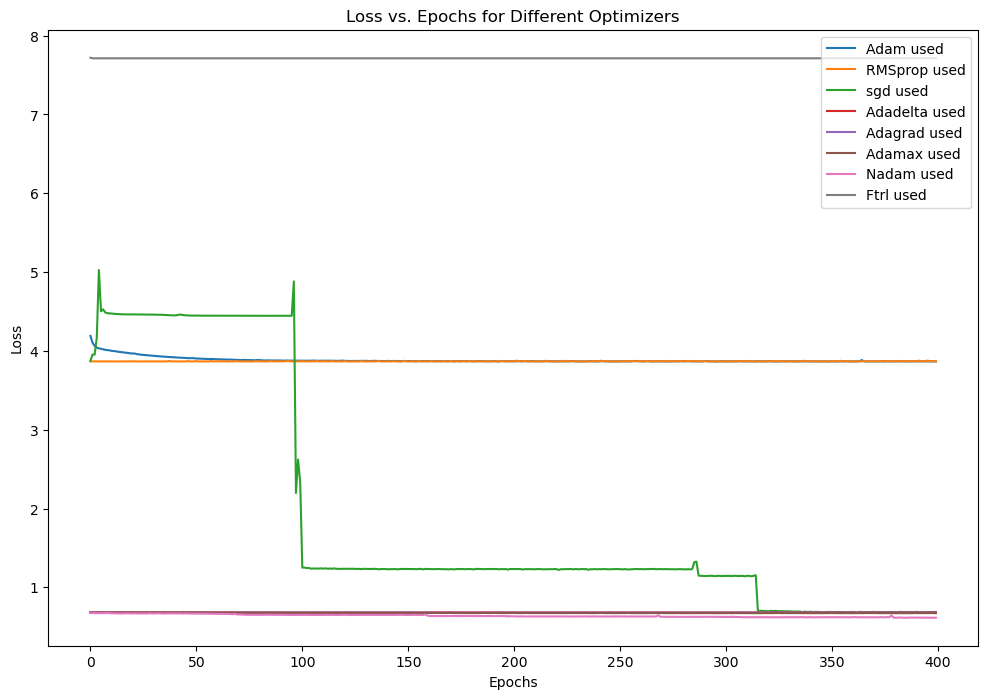

Optimizers: ['Adam', 3.8653903007507324, 'RMSprop', 3.865039825439453, 'sgd', 0.6815272569656372, 'Adadelta', 0.6806966066360474, 'Adagrad', 0.6800661683082581, 'Adamax', 0.6711133718490601, 'Nadam', 0.6132935881614685, 'Ftrl', 7.7124738693237305]


In [26]:
# All Optimizers on One Graph

        # As noted elsewhere the results between looped execution and individual execution seem to vary wildly.

scores_opt = []
optimizers = ['Adam','RMSprop','sgd','Adadelta','Adagrad','Adamax','Nadam','Ftrl']
plt.figure(figsize=(12, 8))
model = Sequential()
model.add(Dense(3, input_dim=2, activation='elu')) 
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh')) # Diminishing returns with elu. 1 elu and 4 tanh for best results.

for opt in optimizers:

    model.compile(loss='binary_crossentropy', optimizer=opt)
   
    history = model.fit(X, y, batch_size=2, epochs=400, verbose=0)
    
    plt.plot(history.history['loss'], label=f'{opt} used')
    
    model.summary()
    
    score = model.evaluate(X, y)
    scores_opt.append(score)
    
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Different Optimizers')
plt.legend()
plt.show()
printout_opt = [item for sublist in zip(optimizers, scores_opt) for item in sublist]
print("Optimizers:", printout_opt)

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [29]:
# BYOD Import

heart = pd.read_csv('../data/heart+disease/processed.cleveland.data', index_col=False, 
                    names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", 
                           "exang", "oldpeak", "slope", "ca", "thal", "num"])

heart_clean = heart[pd.to_numeric(heart["ca"], errors='coerce').notnull()] # Couldn't figure out how to make this
                                                                           # work with multiple columns at once.

heart_clean = heart_clean[pd.to_numeric(heart_clean["oldpeak"], errors='coerce').notnull()] # Removes '?'

heart_clean = heart_clean[pd.to_numeric(heart_clean["thal"], errors='coerce').notnull()] # Removes '?'

heart_clean["heart_disease"] = heart_clean['num'].astype(bool)
heart_clean["heart_disease"],heart_clean['num']
heart_clean = heart_clean.dropna()

In [30]:
heart_clean

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca thal  num  heart_disease  
0      3.0  0.0  6.0    0          False  
1      2.0  3.0  3.0    2           True  
2      2.0  2.0  7.0    1           True  
3      3.0  0.0  3.0    0          False  
4      1.0  0.0  3.0    0          False  
..     ...  ...  ...  ...            ...  
297    2.0  0.0  7.0    1           True  
298    2.0  0.0  7.0    1           True  
299    2.0  2.0  7.0    2           True  
300    2.0  1.0  7.0    3           True  
301    2.0  1.0  3.0    1           True  

[297 rows x 15 columns]

In [31]:
# Setting up the target and dataset.

xray = heart_clean.copy()
yankee = heart_clean['heart_disease'].copy()
xray = xray.drop(columns=['num', 'heart_disease'], axis=1)

xray = np.asarray(xray).astype('float32') # Issues with 'float' data type; only solution I could come up with

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 24)                336       
                                                                 
 dense_113 (Dense)           (None, 24)                600       
                                                                 
 dense_114 (Dense)           (None, 24)                600       
                                                                 
 dense_115 (Dense)           (None, 24)                600       
                                                                 
Total params: 2136 (8.34 KB)
Trainable params: 2136 (8.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
10/10 [==============================] - 0s 891us/step - loss: 0.4335


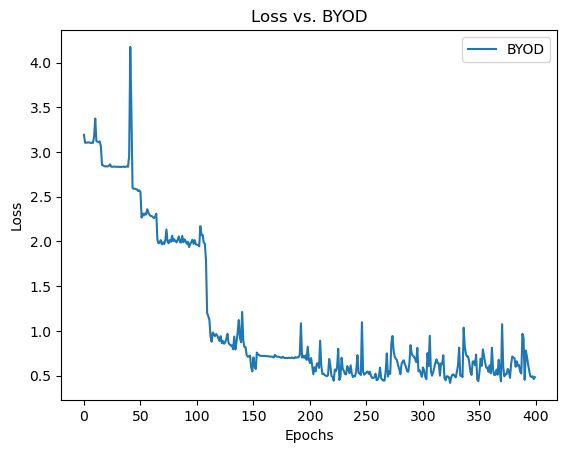

BYOD Loss Score: 0.4335453510284424


In [32]:
# NN Model Build

byod = Sequential()

byod.add(Dense(24, input_dim=13, activation='elu')) # Exponential Linear Unit.
#byod.add(Dense(12, activation='sigmoid')) # From what I can see sigmoid just adds a lot of noise
byod.add(Dense(24, activation='selu')) # Scaled Exponential Linear Unit (SELU).
byod.add(Dense(24, activation='softsign')) # Softmax converts a vector of values to a probability distribution.
                                           # Softsign activation function, softsign(x) = x / (abs(x) + 1)
byod.add(Dense(24, activation='tanh'))

byod.compile(loss='binary_crossentropy', optimizer='Nadam') # Much like Adam is essentially RMSprop with momentum, 
                                                            # Nadam is Adam with Nesterov momentum.
history = byod.fit(xray, yankee, batch_size=2, epochs=400, verbose=0)
    
plt.plot(history.history['loss'], label='BYOD')
    
byod.summary()

score_byod = byod.evaluate(xray, yankee)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. BYOD')
plt.legend()
plt.show()
print("BYOD Loss Score:", score_byod)


0.43 loss score was the best I was able to optimize for with the data I brought. The Heart dataset only has 297 observations once it has been cleaned which is a fairly small training size for a neural net. With that in mind I am fairly happy with the results.

In [73]:
model = Sequential()

model.add(Dense(2, input_dim=2, activation='tanh'))  #sigmoid, relu
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1,input_dim=2, activation='sigmoid'))


sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
#print(model.predict_proba(X).reshape(4*n))

# evaluate the model
scores = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 0s 1ms/step - loss: 0.7131
Epoch 2/400
80/80 [==============================] - 0s 820us/step - loss: 0.7043
Epoch 3/400
80/80 [==============================] - 0s 790us/step - loss: 0.6985
Epoch 4/400
80/80 [==============================] - 0s 772us/step - loss: 0.6949
Epoch 5/400
80/80 [==============================] - 0s 805us/step - loss: 0.6925
Epoch 6/400
80/80 [==============================] - 0s 754us/step - loss: 0.6908
Epoch 7/400
80/80 [==============================] - 0s 737us/step - loss: 0.6898
Epoch 8/400
80/80 [==============================] - 0s 713us/step - loss: 0.6888
Epoch 9/400
80/80 [==============================] - 0s 720us/step - loss: 0.6879
Epoch 10/400
80/80 [==============================] - 0s 786us/step - loss: 0.6872
Epoch 11/400
80/80 [==============================] - 0s 815us/step - loss: 0.6865
Epoch 12/400
80/80 [==============================] - 0s 761us/step - loss: 0.6858
Epoch 13/400
80

80/80 [==============================] - 0s 748us/step - loss: 0.5750
Epoch 197/400
80/80 [==============================] - 0s 753us/step - loss: 0.5748
Epoch 198/400
80/80 [==============================] - 0s 755us/step - loss: 0.5742
Epoch 199/400
80/80 [==============================] - 0s 729us/step - loss: 0.5742
Epoch 200/400
80/80 [==============================] - 0s 736us/step - loss: 0.5736
Epoch 201/400
80/80 [==============================] - 0s 759us/step - loss: 0.5732
Epoch 202/400
80/80 [==============================] - 0s 742us/step - loss: 0.5726
Epoch 203/400
80/80 [==============================] - 0s 736us/step - loss: 0.5723
Epoch 204/400
80/80 [==============================] - 0s 736us/step - loss: 0.5718
Epoch 205/400
80/80 [==============================] - 0s 719us/step - loss: 0.5711
Epoch 206/400
80/80 [==============================] - 0s 713us/step - loss: 0.5710
Epoch 207/400
80/80 [==============================] - 0s 740us/step - loss: 0.5703
Epoch 

80/80 [==============================] - 0s 777us/step - loss: 0.3461
Epoch 391/400
80/80 [==============================] - 0s 690us/step - loss: 0.3456
Epoch 392/400
80/80 [==============================] - 0s 693us/step - loss: 0.3457
Epoch 393/400
80/80 [==============================] - 0s 730us/step - loss: 0.3464
Epoch 394/400
80/80 [==============================] - 0s 700us/step - loss: 0.3457
Epoch 395/400
80/80 [==============================] - 0s 716us/step - loss: 0.3450
Epoch 396/400
80/80 [==============================] - 0s 711us/step - loss: 0.3475
Epoch 397/400
80/80 [==============================] - 0s 737us/step - loss: 0.3463
Epoch 398/400
80/80 [==============================] - 0s 840us/step - loss: 0.3463
Epoch 399/400
80/80 [==============================] - 0s 783us/step - loss: 0.3450
Epoch 400/400
5/5 [==============================] - 0s 1ms/step - loss: 0.3379


In [52]:
print(model.predict_proba(X).reshape(4*n))


AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [53]:
scores = model.evaluate(X, y)
scores, model.metrics_names

5/5 [==============================] - 0s 1ms/step - loss: 2.3497


(2.349733829498291, ['loss'])

 32/160 [=====>........................] - ETA: 0s

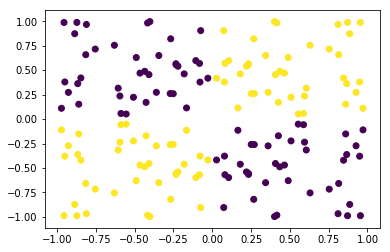

In [127]:
plt.scatter(*zip(*X), c=model.predict_classes(X))

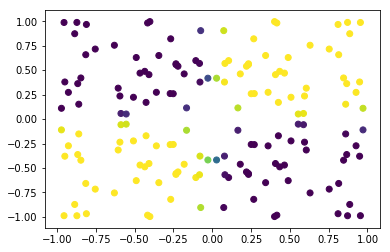

In [128]:
plt.scatter(*zip(*X), c=model.predict(X))

## Using Diabetes data 

http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

In [135]:
# load pima indians dataset
dataset = np.loadtxt("../data/pima-indians-diabetes.data", delimiter=",")
# split into input (X) and output (Y) variables
Z = dataset[:,0:8]
W = dataset[:,8]

In [144]:
dataset.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [136]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(Z, W, epochs=1000, batch_size=10)
# evaluate the model
scores = model.evaluate(Z, W)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1000
768/768 [==============================] - 1s - loss: 0.6821 - acc: 0.5820     
Epoch 2/1000
768/768 [==============================] - 0s - loss: 0.6273 - acc: 0.6536     
Epoch 3/1000
768/768 [==============================] - 0s - loss: 0.6122 - acc: 0.6719     
Epoch 4/1000
768/768 [==============================] - 0s - loss: 0.6111 - acc: 0.6680     
Epoch 5/1000
768/768 [==============================] - 0s - loss: 0.6065 - acc: 0.6862     
Epoch 6/1000
768/768 [==============================] - 0s - loss: 0.6049 - acc: 0.6745     
Epoch 7/1000
768/768 [==============================] - 0s - loss: 0.5978 - acc: 0.6810     
Epoch 8/1000
768/768 [==============================] - 0s - loss: 0.5961 - acc: 0.6823     
Epoch 9/1000
768/768 [==============================] - 0s - loss: 0.5927 - acc: 0.6966     
Epoch 10/1000
768/768 [==============================] - 0s - loss: 0.5906 - acc: 0.6953     
Epoch 11/1000
768/768 [==============================] - 0s - loss: 0

768/768 [==============================] - 0s - loss: 0.5103 - acc: 0.7539     
Epoch 175/1000
768/768 [==============================] - 0s - loss: 0.5135 - acc: 0.7565     
Epoch 176/1000
768/768 [==============================] - 0s - loss: 0.5115 - acc: 0.7552     
Epoch 177/1000
768/768 [==============================] - 0s - loss: 0.5084 - acc: 0.7500     
Epoch 178/1000
768/768 [==============================] - 0s - loss: 0.5079 - acc: 0.7591     
Epoch 179/1000
768/768 [==============================] - 0s - loss: 0.5088 - acc: 0.7591     
Epoch 180/1000
768/768 [==============================] - 0s - loss: 0.5059 - acc: 0.7630     
Epoch 181/1000
768/768 [==============================] - 0s - loss: 0.5171 - acc: 0.7409     
Epoch 182/1000
768/768 [==============================] - 0s - loss: 0.5123 - acc: 0.7435     
Epoch 183/1000
768/768 [==============================] - 0s - loss: 0.5168 - acc: 0.7526     
Epoch 184/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4906 - acc: 0.7656     
Epoch 347/1000
768/768 [==============================] - 0s - loss: 0.4924 - acc: 0.7734     
Epoch 348/1000
768/768 [==============================] - 0s - loss: 0.4848 - acc: 0.7734     
Epoch 349/1000
768/768 [==============================] - 0s - loss: 0.4895 - acc: 0.7669     
Epoch 350/1000
768/768 [==============================] - 0s - loss: 0.4924 - acc: 0.7656     
Epoch 351/1000
768/768 [==============================] - 0s - loss: 0.4906 - acc: 0.7643     
Epoch 352/1000
768/768 [==============================] - 0s - loss: 0.4851 - acc: 0.7747     
Epoch 353/1000
768/768 [==============================] - 0s - loss: 0.4825 - acc: 0.7747     
Epoch 354/1000
768/768 [==============================] - 0s - loss: 0.4781 - acc: 0.7786     
Epoch 355/1000
768/768 [==============================] - 0s - loss: 0.4828 - acc: 0.7656     
Epoch 356/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4801 - acc: 0.7760     
Epoch 519/1000
768/768 [==============================] - 0s - loss: 0.4730 - acc: 0.7760     
Epoch 520/1000
768/768 [==============================] - 0s - loss: 0.4705 - acc: 0.7865     
Epoch 521/1000
768/768 [==============================] - 0s - loss: 0.4742 - acc: 0.7734     
Epoch 522/1000
768/768 [==============================] - 0s - loss: 0.4693 - acc: 0.7878     
Epoch 523/1000
768/768 [==============================] - 0s - loss: 0.4825 - acc: 0.7630     
Epoch 524/1000
768/768 [==============================] - 0s - loss: 0.4787 - acc: 0.7812     
Epoch 525/1000
768/768 [==============================] - 0s - loss: 0.4712 - acc: 0.7865     
Epoch 526/1000
768/768 [==============================] - 0s - loss: 0.4652 - acc: 0.7878     
Epoch 527/1000
768/768 [==============================] - 0s - loss: 0.4686 - acc: 0.7891     
Epoch 528/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4566 - acc: 0.7812     
Epoch 691/1000
768/768 [==============================] - 0s - loss: 0.4701 - acc: 0.7773     
Epoch 692/1000
768/768 [==============================] - 0s - loss: 0.4743 - acc: 0.7799     
Epoch 693/1000
768/768 [==============================] - 0s - loss: 0.4768 - acc: 0.7773     
Epoch 694/1000
768/768 [==============================] - 0s - loss: 0.4626 - acc: 0.7878     
Epoch 695/1000
768/768 [==============================] - 0s - loss: 0.4622 - acc: 0.7904     
Epoch 696/1000
768/768 [==============================] - 0s - loss: 0.4624 - acc: 0.7826     
Epoch 697/1000
768/768 [==============================] - 0s - loss: 0.4634 - acc: 0.7917     
Epoch 698/1000
768/768 [==============================] - 0s - loss: 0.4624 - acc: 0.7813     
Epoch 699/1000
768/768 [==============================] - 0s - loss: 0.4590 - acc: 0.7917     
Epoch 700/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4636 - acc: 0.7865     
Epoch 863/1000
768/768 [==============================] - 0s - loss: 0.4605 - acc: 0.7839     
Epoch 864/1000
768/768 [==============================] - 0s - loss: 0.4657 - acc: 0.7773     
Epoch 865/1000
768/768 [==============================] - 0s - loss: 0.4735 - acc: 0.7669     
Epoch 866/1000
768/768 [==============================] - 0s - loss: 0.4608 - acc: 0.7904     
Epoch 867/1000
768/768 [==============================] - 0s - loss: 0.4640 - acc: 0.7956     
Epoch 868/1000
768/768 [==============================] - 0s - loss: 0.4449 - acc: 0.7969     
Epoch 869/1000
768/768 [==============================] - 0s - loss: 0.4544 - acc: 0.7812     
Epoch 870/1000
768/768 [==============================] - 0s - loss: 0.4624 - acc: 0.7839     
Epoch 871/1000
768/768 [==============================] - 0s - loss: 0.4663 - acc: 0.7760     
Epoch 872/1000
768/768 [==============================] - 0s - lo